In [16]:
import matplotlib.pyplot as plt
import numpy as np

# from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import california_housing
from keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    ReLU,
    Softmax,
)
from keras.losses import MeanSquaredError
from keras.metrics import MeanSquaredError
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# from keras.utils import plot_model

In [17]:
(X_train, y_train), (X_test, y_test) = california_housing.load_data()

In [18]:
X_train.shape

(16512, 8)

In [19]:
X_test.shape

(4128, 8)

In [20]:
y_train.shape

(16512,)

In [21]:
y_test.shape

(4128,)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[ 0.6457759 , -0.7209302 ,  1.8532751 , ..., -0.3331862 ,
        -0.02698459, -0.04505231],
       [ 0.60079885, -0.78197217, -0.60761106, ..., -0.12736216,
         0.14330861, -0.6016902 ],
       [-1.4130851 ,  1.0023171 ,  1.8532751 , ..., -0.62376136,
        -0.2669432 ,  0.05375447],
       ...,
       [-1.3880974 ,  0.9131032 ,  1.8532751 , ..., -0.481933  ,
        -0.36757097,  2.313189  ],
       [-1.3081437 ,  1.063359  , -0.8457613 , ...,  0.17359067,
         0.600004  ,  2.254748  ],
       [ 0.56581837, -0.66927946,  0.02745632, ...,  0.43995124,
         0.45809302, -0.39965007]], dtype=float32)

In [24]:
y_train

array([252300., 146900., 290900., ..., 500001., 499000., 238100.],
      dtype=float32)

In [25]:
model = Sequential(
    layers=[
        Input(shape=(8,)),
        Dense(128),
        ReLU(),
        Dense(64),
        ReLU(),
        Dense(32),
        ReLU(),
        Dense(1),
    ],
    name="ann",
)

In [26]:
model.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss="mse", optimizer=Adam(), metrics=["mse"])

In [28]:
ann_history = model.fit(
    X_train, y_train, batch_size=32, epochs=200, validation_split=0.2
)

Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 53021474816.0000 - mse: 53021474816.0000 - val_loss: 20627496960.0000 - val_mse: 20627496960.0000
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 14172166144.0000 - mse: 14172166144.0000 - val_loss: 9313884160.0000 - val_mse: 9313884160.0000
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 8843149312.0000 - mse: 8843149312.0000 - val_loss: 6992522752.0000 - val_mse: 6992522752.0000
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 7038192640.0000 - mse: 7038192640.0000 - val_loss: 5787337216.0000 - val_mse: 5787337216.0000
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 5934112768.0000 - mse: 5934112768.0000 - val_loss: 5165739520.0000 - val_mse: 5165739520.0000
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 5378726400.0000 - mse: 5378726400.0000 - val_loss: 4790393344.0000 - val_mse: 4790393344.0000
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/st

In [29]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["mse"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_mse"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 4057759023.36
Validation loss: 3957010551.04
4057759023.360000 Training accuracy with a standard deviation of 3134577170.250828
3957010551.040000 Validation accuracy with a standard deviation of 1311644916.236355


FileNotFoundError: [Errno 2] No such file or directory: '/Users/debjitpal/Documents/GitHub/Images/california_ann_acc_loss.png'

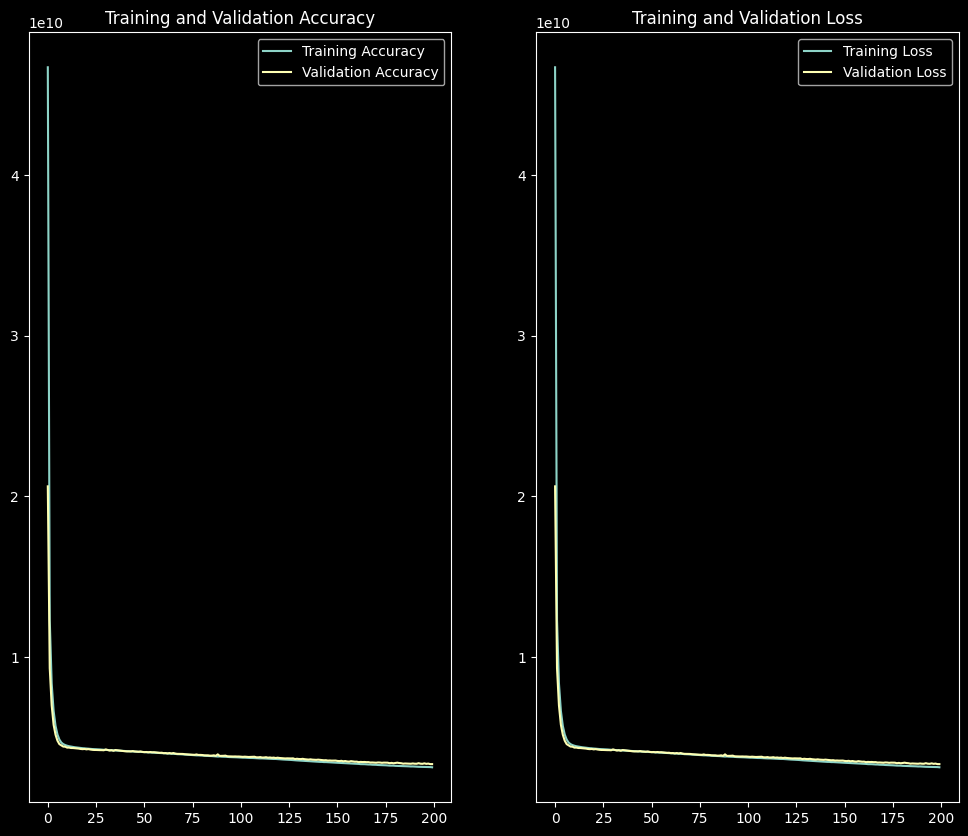

In [30]:
epochs_range = range(200)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/california_ann_acc_loss.png", bbox_inches="tight")

In [31]:
ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 3456585728.0000 - mse: 3456585728.0000
Test loss: 3376968960.0
Test accuracy: 3376968960.0


In [ ]:
y_pred = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
